In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
image=plt.imread('dataset/einstein.jpeg')

In [39]:
image=(image.mean(2))

In [31]:
image.shape

(201, 251, 3)

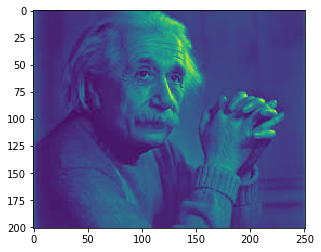

In [33]:
plt.imshow(image)

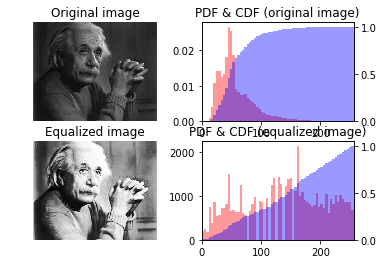

In [40]:
plt.subplot(2,2,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image,cmap='gray')


# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,2,2)
plt.xlim((0,255))
#plt.title('Normalized histogram')
plt.hist(pixels,bins=64,range=(0,256),normed=True,color='red',alpha=0.4)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf, bins, patches = plt.hist(pixels, bins=64, range=(0,256),
               normed=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')

new_pixels = np.interp(pixels, bins[:-1], cdf*255)
new_image = new_pixels.reshape(201, 251)
plt.subplot(2,2,3)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')

plt.subplot(2,2,4)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)

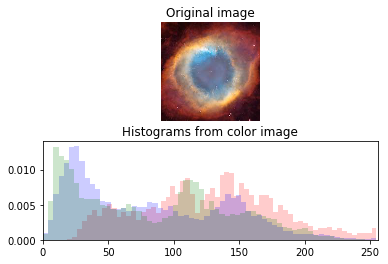

In [36]:
col_image = plt.imread('dataset/colored.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(col_image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = col_image[:,:,0], col_image[:,:,1], col_image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()
